<a href="https://colab.research.google.com/github/nahidkawsar/Performance-Visualization-of-VGG16-based-Model-for-CT-Kidney-Dataset/blob/main/Performance_Visualization_of_VGG16_based_Model_for_CT_Kidney_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
License(s): copyright-authors
 99% 1.50G/1.52G [00:10<00:00, 221MB/s]
100% 1.52G/1.52G [00:10<00:00, 158MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ct-kidney-dataset-normal-cyst-tumor-and-stone.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [5]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(
    weights='imagenet', #Taking the previous weights
    include_top = False, #Meaning we are not taking the dense layers ,meaning just taking the CNN part not the ANN part
    input_shape=(150,150,3) #This the input shape ,as our wish
)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
#For 4 output class
model.add(Dense(4, activation='softmax'))
#For 2 binary classification
#model.add(Dense(1,activation='sigmoid'))


In [7]:
conv_base.trainable = False

In [8]:
import os
base_dir = "/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
os.listdir(base_dir)

['Tumor', 'Cyst', 'Normal', 'Stone']

In [9]:
import tensorflow as tf
# Split data into training set and validation set
train_generator = tf.keras.preprocessing.image_dataset_from_directory (
    base_dir,
    validation_split=0.2,
    seed=123, subset="training",
    image_size=(150,150),
    batch_size=32
)
validation_generator = tf.keras.preprocessing.image_dataset_from_directory (
    base_dir,
    validation_split=0.2,
    seed=123,
    subset="validation",
    image_size=(150,150),
    batch_size=32
)

Found 12446 files belonging to 4 classes.
Using 9957 files for training.
Found 12446 files belonging to 4 classes.
Using 2489 files for validation.


In [10]:
label_to_class_name = dict(zip(range(len(train_generator.class_names)),
train_generator.class_names))
label_to_class_name

{0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}

# **This or this**

In [11]:
# Normalize

'''def process(image,label):
  image = tensorflow.cast(image/255. ,tensorflow.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)'''

'def process(image,label): \n  image = tensorflow.cast(image/255. ,tensorflow.float32) \n  return image,label\n\ntrain_ds = train_ds.map(process) \nvalidation_ds = validation_ds.map(process)'

In [12]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


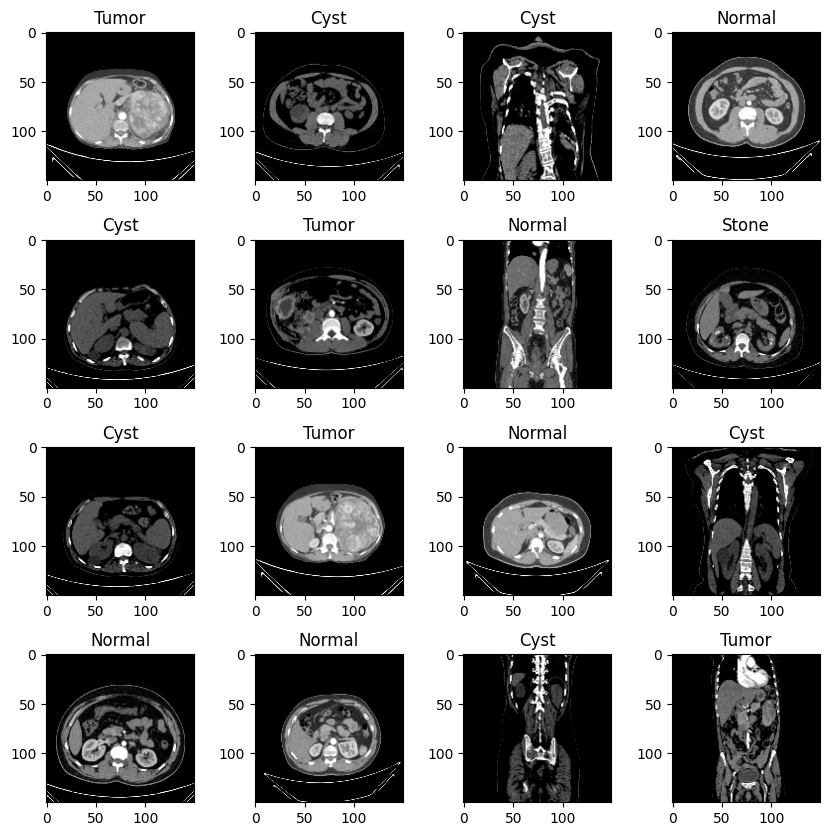

In [13]:
data_iterator = train_generator.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [14]:
train=train_generator.map(lambda x,y:(x/255,y))
val=validation_generator.map(lambda x,y:(x/255,y))

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
#For multiclass classification

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
'''For binary classification

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])'''

"For binary classification\n\nmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])"

In [18]:
history = model.fit( #For data augmentation use model.fit_generator rather than model.fit
                    train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
312/312 [==============================] - 42s 112ms/step - loss: 1.9293 - accuracy: 0.9121 - val_loss: 0.0390 - val_accuracy: 0.9908
Epoch 2/10
312/312 [==============================] - 31s 97ms/step - loss: 0.0146 - accuracy: 0.9960 - val_loss: 0.0130 - val_accuracy: 0.9936
Epoch 3/10
312/312 [==============================] - 30s 96ms/step - loss: 0.0125 - accuracy: 0.9968 - val_loss: 0.0022 - val_accuracy: 0.9992
Epoch 4/10
312/312 [==============================] - 32s 102ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 5/10
312/312 [==============================] - 32s 99ms/step - loss: 1.9506e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 6/10
312/312 [==============================] - 33s 104ms/step - loss: 8.8129e-05 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9992
Epoch 7/10
312/312 [==============================] - 33s 104ms/step - loss: 6.6138e-05 - accuracy: 1.0000 - val_loss: 0.0021

Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy: 1.0\nValidation Accuracy: 0.999196469783783')

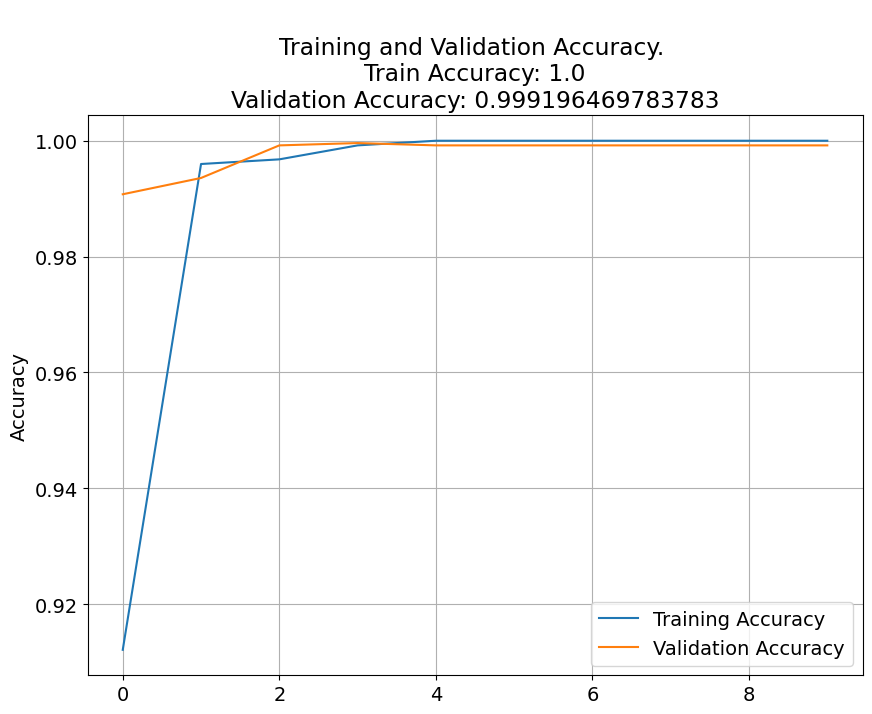

In [20]:
# Visualizing the model’s performance

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy: {str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')


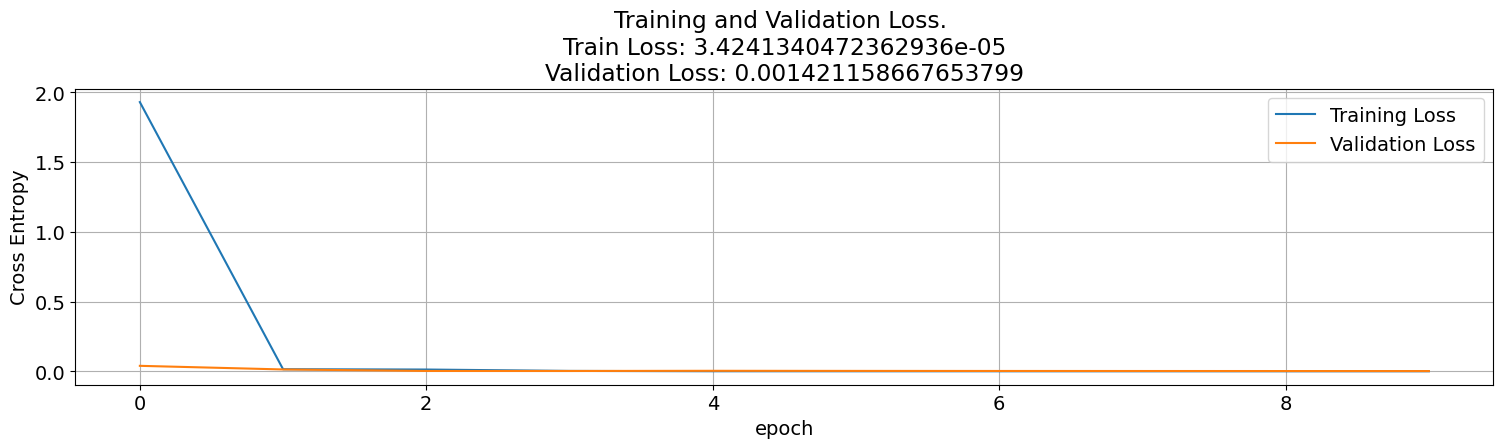

In [21]:
# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss: {str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()


1/1 [==============================] - 1s 1s/step


array([[9.99997497e-01, 1.13239995e-08, 5.24302720e-07, 2.00885574e-06]],
      dtype=float32)

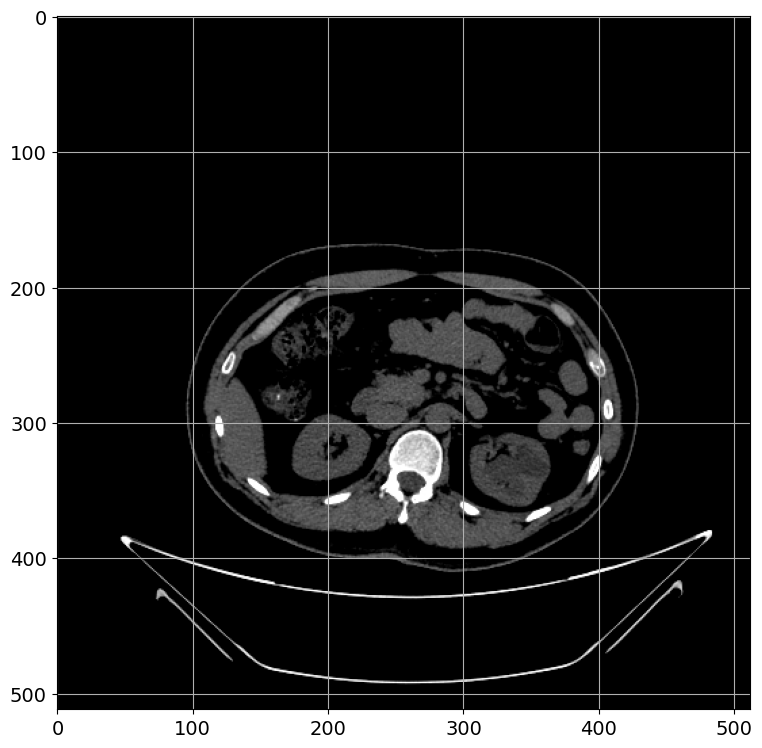

In [25]:
import cv2
test_img = cv2.imread('/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1001).jpg')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(150,150))
test_input = test_img.reshape((1,150,150,3))
model.predict(test_input)

In [26]:
model.save("Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
